In [1]:
import sys
import pandas as pd
from glob import glob
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def calc_results(glob_dir):
    dframes = [pd.read_csv(f) for f in glob(os.path.join(glob_dir, '*.csv'))]
    df = pd.concat(dframes)
    # MB/s
    df['bandwidth'] = df.size_in_bytes * df.nprocs / df.runtime / 1e6
    res = (df.groupby(['operation', 'nprocs', 'size_in_bytes', 'format'])
         .bandwidth
         .aggregate(['count', 'mean', 'std']))
    return res

In [3]:
# these were all run on a single node
res_singlenode = calc_results('./data_cheyenne_singlenode/')
# these were run on 1-4 nodes with 9 mpiprocs per node
res_multinode = calc_results('./data_cheyenne_mpiprocs09/')

/Users/rpa/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
res_singlenode

count          mean          std
operation nprocs size_in_bytes format                                  
read      1      800000        hdf      1000   1654.295093   123.295824
                               zarr     1000   1820.303951   106.067755
                 4000000       hdf      1000   3539.632273   769.311316
                               zarr     1000   3052.990223   385.386454
                 8000000       hdf      1000   2903.516980  1091.647126
                               zarr     1000   2039.743969   501.218403
                 16000000      hdf      1000   2627.977022   866.124057
                               zarr     1000   1981.909055   493.653441
          2      800000        hdf      1000   3238.336225    89.059787
                               zarr     1000   3467.523615   215.802748
                 4000000       hdf      1000   4762.344566  1278.406864
                               zarr     1000   3825.980582  1371.443323
                 8000000       hdf      1000   4366.808768  1091.584163
                               zarr     1000   2952.087681   948.919967
                 16000000      hdf      1000   4135.376625   672.574907
                               zarr     1000   2770.832944   793.151749
          4      800000        hdf      1000   6338.385101   349.647593
                               zarr     1000   6250.689772   947.658552
                 4000000       hdf      1000   7737.455191  1995.781250
                               zarr     1000   6457.923723  3180.125483
                 8000000       hdf      1000   7861.830431  2152.086384
                               zarr     1000   5180.826322  1481.999742
                 16000000      hdf      1000   6937.808514  2575.755553
                               zarr     1000   1970.614011   889.349353
          9      800000        hdf      1000  11021.687371  1057.885492
                               zarr     1000  11262.001530  2217.015424
                 4000000       hdf      1000   9743.013159  2654.304052
                               zarr     1000   8404.908189  4436.151668
                 8000000       hdf      1000   7619.175737  4021.439740
                               zarr     1000   5106.324057  2513.646494
...                                      ...           ...          ...
write     4      4000000       hdf      1000   6386.591205   295.709195
                               zarr     1000   3185.976846   452.490606
                 8000000       hdf      1000   9564.093916  1440.074778
                               zarr     1000   2722.340654   655.235943
                 16000000      hdf      1000   9454.175484  2111.095487
                               zarr     1000   3851.639168   879.348916
          9      800000        hdf      1000   4034.049956   788.310998
                               zarr     1000   2681.145379   822.081984
                 4000000       hdf      1000  10182.442554  1982.556233
                               zarr     1000   4387.596578   909.968350
                 8000000       hdf      1000  11430.979209  3252.327610
                               zarr     1000   4084.066283   835.104851
                 16000000      hdf      1000   9499.879281  4047.237257
                               zarr     1000   5681.503994  1259.271165
          18     800000        hdf      1000   4405.305778  1255.788775
                               zarr     1000   2858.826274   779.595688
                 4000000       hdf      1000  10421.875377  3457.735696
                               zarr     1000   4386.771224   854.740096
                 8000000       hdf      1000   9356.440608  4173.528617
                               zarr     1000   4288.504493   716.758117
                 16000000      hdf      1000   8277.481278  3962.363153
                               zarr     1000   6195.193724  1211.151651
          36     800000        hdf      1000   5436.732906  1869.433210
       

In [13]:
res_multinode

count          mean          std
operation nprocs size_in_bytes format                                  
read      9      800000        hdf      1000  10652.531837  1714.471858
                               zarr     1000  11212.768913  2749.108916
                 4000000       hdf      2000   9115.949556  3524.678512
                               zarr     2000   9432.803057  5147.579768
          18     800000        hdf      1000   6867.759308  6772.914846
                               zarr     1000  10472.239796  8409.448280
                 4000000       hdf      2000   1573.899212  1052.183083
                               zarr     2000     59.437338    21.097928
          36     800000        hdf      1000   3993.450095  2649.483749
                               zarr     1000   6379.083500  9608.275570
                 4000000       hdf      2000   1975.693591   717.895627
                               zarr     2000    114.759459    39.676122
          72     800000        hdf      1000   3368.757460  2823.913605
                               zarr     1000   2144.109216  4016.104955
                 4000000       hdf      1300   3025.431289   871.586775
                               zarr     1300    221.264528    68.881148
write     9      800000        hdf      1000   4024.875207   816.548930
                               zarr     1000   2686.409856   884.996986
                 4000000       hdf      2000  10007.426203  2198.312871
                               zarr     2000   4084.345718   945.307253
          18     800000        hdf      1000    598.180490   357.176247
                               zarr     1000     56.172752     6.755258
                 4000000       hdf      2000   1820.636820  1071.118538
                               zarr     2000     76.487613     5.921213
          36     800000        hdf      1000   1122.858469   614.218621
                               zarr     1000     77.043290     8.865373
                 4000000       hdf      2000   2062.564419   819.000321
                               zarr     2000    141.784417     9.800815
          72     800000        hdf      1000    608.532994   559.985811
                               zarr     1000     88.502820    12.020458
                 4000000       hdf      1300   3273.343834  1300.795057
                               zarr     1300    234.894250    18.672016

In [11]:
def plot_results(res, operation='read'):
    fig, ax = plt.subplots(figsize=(10, 6))
    chunk_sizes = res.index.get_level_values('size_in_bytes').unique()
    for fmt, color in zip(['hdf', 'zarr'], ['#1f77b4', '#ff7f0e']):
        for cs, marker in zip(chunk_sizes, ['s', 'o', '^', '*', '>', 'D']):
            res.loc[operation, :, cs, fmt].reset_index().plot(x='nprocs', y='mean', yerr='std',
                                                              ax=ax, label=f'{fmt} cs={cs/1e6} MB',
                                                              color=color, marker=marker)
    ax.legend()
    ax.set_ylabel('throughput MB/s')
    ax.set_xlabel('Num MPI Procs')
    ax.grid()
    return fig, ax

Text(0.5,1,'Read: Single Node')

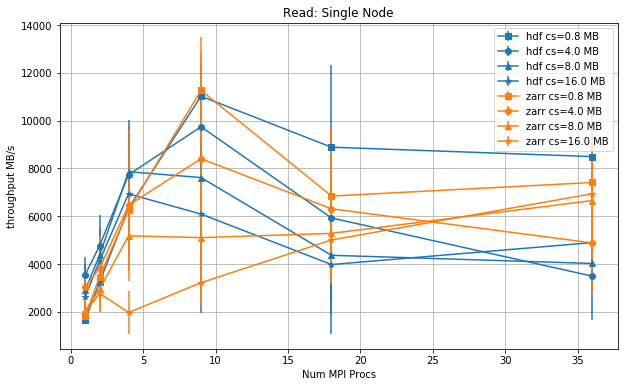

In [10]:
fig, ax = plot_results(res_singlenode, 'read')
ax.set_title('Read: Single Node')

Text(0.5,1,'Write: Single Node')

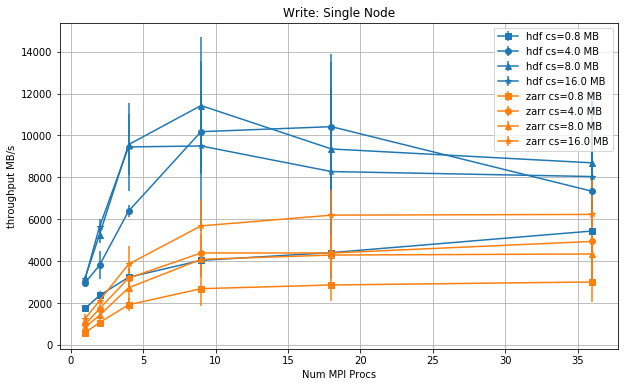

In [6]:
fig, ax = plot_results(res_singlenode, 'write')
ax.set_title('Write: Single Node')

Text(0.5,1,'Read: Multi Node')

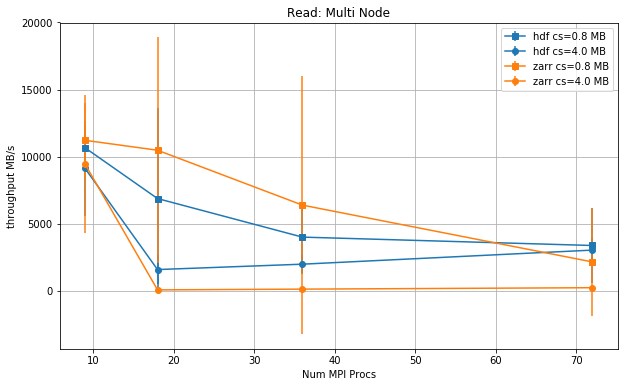

In [7]:
fig, ax = plot_results(res_multinode, 'read')
ax.set_title('Read: Multi Node')

Text(0.5,1,'Write: Multi Node')

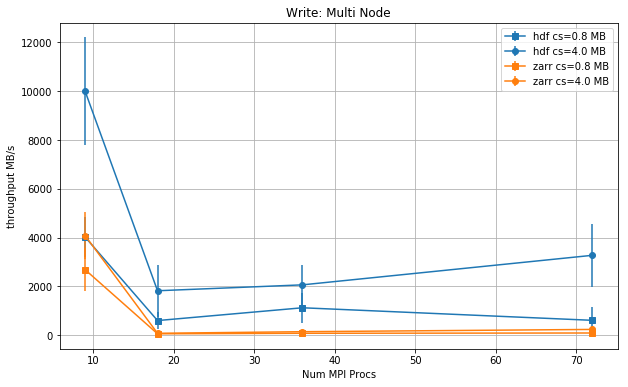

In [8]:
fig, ax = plot_results(res_multinode, 'write')
ax.set_title('Write: Multi Node')